<a href="https://colab.research.google.com/github/luciodias/TCC_PUC/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Carga de Dados

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt", #local do arquivo no Gdrive
                 sep='\t',                                               #arquvio sepado por tab
                 names=['W1','w2','W3','W4','W5','W6','W7','Room'],      #nome dos atributos
                 header=None)                                            #arquivo sem cabeçalho

Estatíscicas básida do dataframe e verificação de dados ausentes e/ou falhas no esquema de importação.

In [ ]:
df.describe() #estatíscicas básida do dataframe

,W1,w2,W3,W4,W5,W6,W7,Room
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


Verificação do balanceamento das classes.

In [ ]:
df['Room'].value_counts() #verificação do balanseamento das classes

1    500
2    500
3    500
4    500
Name: Room, dtype: int64

#Modelagem
Divisão do banco de dados em dados de treino e teste.


In [ ]:
train, test = train_test_split(df, test_size=0.2)

In [ ]:
xtrain = train.loc[:, 'W1':'W7']
ytrain = train[['Room']].values.ravel()  # values.ravel() converte de Coluna pra Array
xtest = test.loc[:, 'W1':'W7']
ytest = test[['Room']].values.ravel()  # values.ravel() converte de Coluna pra Array

Text(0.5, 15.0, 'Módulo da correlação entre os sinais')

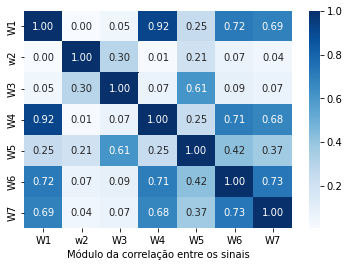

In [ ]:
corrM = xtrain.corr().abs()
sns.heatmap(corrM, cmap="Blues", annot=True,fmt=".2f")
plt.xlabel('Módulo da correlação entre os sinais')

Feature Selection

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect, f_classif
k_vs_feature = []

for k in range(7):
  transformer = GenericUnivariateSelect(f_classif, mode='k_best', param=k+1)
  X_new = transformer.fit_transform(xtrain, ytrain)
  k_vs_feature.append(transformer.get_support())
pd.DataFrame(k_vs_feature, range(1,8), xtrain.columns)

,W1,w2,W3,W4,W5,W6,W7
1,False,False,False,True,False,False,False
2,True,False,False,True,False,False,False
3,True,False,False,True,True,False,False
4,True,False,False,True,True,True,False
5,True,False,False,True,True,True,True
6,True,False,True,True,True,True,True
7,True,True,True,True,True,True,True


#Naive Bayes

Text(33.0, 0.5, 'Valor Verdadeiro')

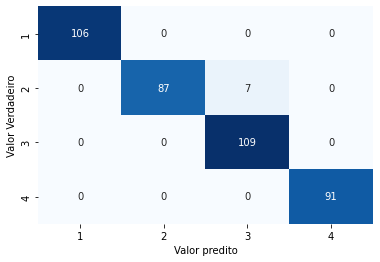

In [ ]:
model = GaussianNB()                       # 2. instantiate model
model.fit(xtrain,ytrain)  # values.ravel() converte de Coluna pra Array
y_model = model.predict(xtest)             # 4. predict on new data
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=False, cmap="Blues", annot=True, cbar=False, fmt=".0f", xticklabels=['1','2','3','4'], yticklabels=['1','2','3','4'])
plt.xlabel('Valor predito')
plt.ylabel('Valor Verdadeiro')

In [ ]:
#model.score(xtest,ytest)
print(classification_report(ytest, model.predict(xtest)))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      0.93      0.96        94
           3       0.94      1.00      0.97       109
           4       1.00      1.00      1.00        91

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



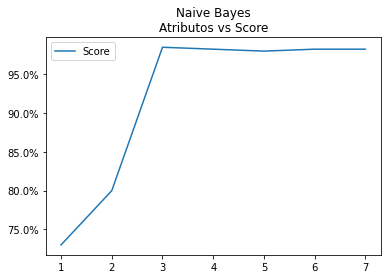

In [ ]:
kDic={}
for idx, mask in enumerate(k_vs_feature):
  model.fit(xtrain.iloc[:,mask],ytrain)  # values.ravel() converte de Coluna pra Array
  #print("k={} - score {}".format(idx+1,model.score(xtest.iloc[:,mask], ytest)))
  kDic[idx+1] = model.score(xtest.iloc[:,mask], ytest)
graf = pd.DataFrame(kDic.values(),kDic.keys(),['Score']).plot(title='Naive Bayes\nAtributos vs Score')
graf.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 

#Random Forest Classifier

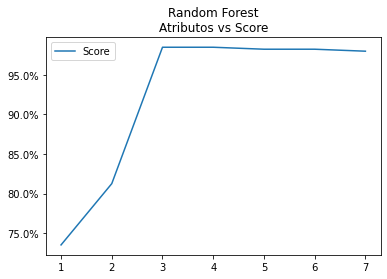

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7, random_state=0)
kDic= {}
for idx, mask in enumerate(k_vs_feature):
  clf.fit(xtrain.iloc[:,mask],ytrain) 
  #print("k={} - score {}".format(idx+1,clf.score(xtest.iloc[:,mask], ytest)))
  kDic[idx+1] = clf.score(xtest.iloc[:,mask], ytest)
graf = pd.DataFrame(kDic.values(),kDic.keys(),['Score']).plot(title='Random Forest\nAtributos vs Score')
graf.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 

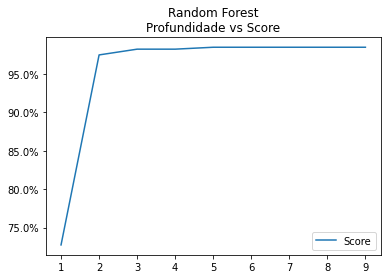

In [ ]:
kDic = {}
for deep in range(1,10):
  clf = RandomForestClassifier(max_depth=deep, random_state=0)
  mask = k_vs_feature[2]  # referente à mascara para 3 sinais W4, W1 e W5
  clf.fit(xtrain.iloc[:,mask],ytrain)  # values.ravel() converte de Coluna pra Array
  #print("deep={} - score {}".format(deep,clf.score(xtest.iloc[:,mask], ytest)))
  kDic[deep] = clf.score(xtest.iloc[:,mask], ytest)
graf = pd.DataFrame(kDic.values(),kDic.keys(),['Score']).plot(title='Random Forest\nProfundidade vs Score')
graf.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 

#Nearest Neighbors Classification

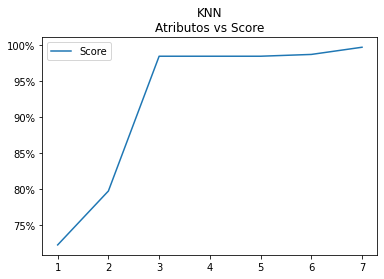

In [ ]:
kDic= {}
neigh = KNeighborsClassifier(n_neighbors=4)
for idx, mask in enumerate(k_vs_feature):
  neigh.fit(xtrain.iloc[:,mask],ytrain)  
  kDic[idx+1] = neigh.score(xtest.iloc[:,mask], ytest)
graf = pd.DataFrame(kDic.values(),kDic.keys(),['Score']).plot(title='KNN\nAtributos vs Score')
graf.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

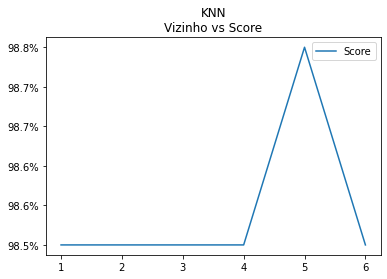

In [ ]:
kDic= {}
for nb in range(1,7):
  neigh = KNeighborsClassifier(n_neighbors=nb)
  mask = k_vs_feature[2]  # referente à mascara para 3 sinais W4, W1 e W5
  neigh.fit(xtrain.iloc[:,mask],ytrain) 
  #print("Neighbors={} - score {}".format(nb, neigh.score(xtest.iloc[:,mask], ytest)))  
  kDic[nb] = neigh.score(xtest.iloc[:,mask], ytest)
graf = pd.DataFrame(kDic.values(),kDic.keys(),['Score']).plot(title='KNN\nVizinho vs Score')
graf.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))  

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


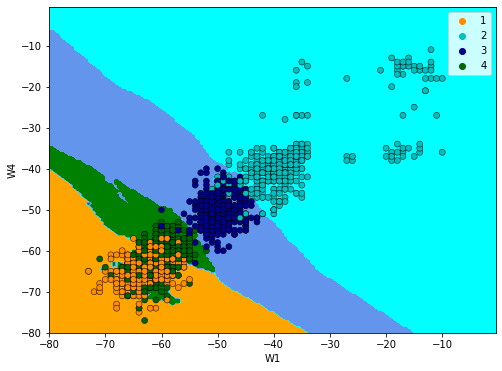

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
import numpy as np
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue", "green"])
cmap_bold = ["darkorange", "c", "darkblue", "darkgreen"]

mask = k_vs_feature[1]  # referente à mascara para 2 sinais W4 2 W1
neigh.fit(xtrain.iloc[:,mask],ytrain)  # values.ravel() converte de Coluna pra Array
h = 0.5 
x_min, x_max = -80, 0
y_min, y_max = -80, 0
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=xtrain['W1'],
    y=xtrain['W4'],
    hue=ytrain,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()